<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name</b></td>
    <td style="text-align:left">Perry B. Koob</td>
</tr>
<tr>
    <td> </td>
    <td style="text-align:left">koobp@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Week03: Example:</b></td>
    <td style="text-align:left">1R Mushroom Example</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">2020-06-22</td>
</tr>
</table>

In [1]:
# Imported for data management (dataframes)
import pandas as pd

# This package needs part of anaconda and needs to be installed
#    conda install -c conda-forge wordcloud

# Imported to allow for the display of word clouds
import matplotlib.pyplot as plt

# Imported to create train/test partitioning of the data.
from sklearn.model_selection import train_test_split

# Imported to get frequency counts
import collections

# Imported to use confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

## Concept Description:
Train a system from existing data to classify mushrooms as either edible or inedible.


## Data Collection:
The data has been provided by Perry B. Koob, not professor or doctor.  It is a modified version of the UCI Mushroom data set found here: https://archive.ics.uci.edu/ml/datasets/mushroom


## Data Import and Wrangling: 

## Example Description:
<img src="images/mushroom-diagram.gif" alt="Mushroom Diagram">


### edible.poisonous

This is the class label.

### cap.shape

Nominal attribute that describes the cap shape of the mushroom as: 

bell     
conical  
convex   
flat     
knobbed  
sunken   

### cap.surface

Nominal attribute that describes the cap surface of the mushroom as: 

fibrous  
grooves  
scaly    
smooth    

### cap.color

Nominal attribute that describes the cap color of the mushroom as:

brown    
buff  
cinnamon  
green  
grey     
pink     
purple   
red      
white    
yellow   

### bruises

Nominal attribute, boolean in nature, that describes if the mushroom has bruises.

### odor

Nominal attribute that describes the odor of the mushroom as: 

almond   
anise    
creosote  
fishy    
foul     
musty    
none     
pungent  
spicy    

### colony

Interval attribute that describes the approximate size of the mushroom colony: 

### edible

This is a binary class label generated from the edible.poisonous class label.  It is a transformation of a nominal Class label, so it is also nominal.The labels are now edible or inedible.

There are no missing values.


The results of each search is read from the respective comma separated value file (csv) into separate dataframes.  Careful attention is paid to make sure the data is read in as character strings.

In [2]:
df = pd.read_csv("mushroom.csv", dtype=str)

In [3]:
df

,edible-poisonous,cap-shape,cap-surface,cap-color,bruises,odor,colony
0,poisonous,convex,smooth,brown,bruises,pungent,6
1,edible,convex,smooth,yellow,bruises,almond,58
2,edible,bell,smooth,white,bruises,anise,42
3,poisonous,convex,scaly,white,bruises,pungent,8
4,edible,convex,smooth,grey,no,none,508
...,...,...,...,...,...,...,...
8119,poisonous,convex,fibrous,grey,no,foul,1
8120,edible,convex,smooth,brown,no,none,118
8121,poisonous,flat,smooth,brown,no,foul,1
8122,edible,knobbed,fibrous,white,no,none,30


In [4]:
df.columns

Index(['edible-poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'colony'],
      dtype='object')

In [5]:
df.loc[(df['edible-poisonous'] == 'edible'),'edible'] = 'edible'
df.loc[(df['edible-poisonous'] == 'poisonous'),'edible'] = 'inedible'

In [6]:
df.columns

Index(['edible-poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'colony', 'edible'],
      dtype='object')

Partition the data into a training set and a test set using a 80/20 split.

In [7]:
X = df.drop(columns=['edible','edible-poisonous'])
Y = df[['edible']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80,random_state=123)

In [8]:
Y

,edible
0,inedible
1,edible
2,edible
3,inedible
4,edible
...,...
8119,inedible
8120,edible
8121,inedible
8122,edible


In [9]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,colony
3930,convex,smooth,grey,bruises,foul,8
2252,convex,scaly,red,bruises,none,2
7720,bell,smooth,grey,no,none,36
1941,convex,fibrous,brown,bruises,none,1
1538,convex,fibrous,grey,no,none,873
...,...,...,...,...,...,...
4060,flat,scaly,brown,bruises,none,1
1346,flat,fibrous,white,no,none,6
3454,flat,fibrous,grey,no,foul,1
7533,knobbed,scaly,brown,no,spicy,1


In [10]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,colony
186,convex,smooth,white,bruises,anise,2
2883,flat,fibrous,grey,bruises,none,2
5769,bell,smooth,buff,bruises,none,2
4363,flat,fibrous,yellow,no,foul,1
2889,flat,fibrous,brown,bruises,none,1
...,...,...,...,...,...,...
5129,convex,scaly,grey,no,foul,1
4895,flat,fibrous,grey,no,foul,1
6744,flat,smooth,brown,no,foul,1
896,convex,smooth,grey,no,none,8


## Exploratory Data Analysis:
Looking into what type of measure the attributes are.

In [11]:
df.describe()

,edible-poisonous,cap-shape,cap-surface,cap-color,bruises,odor,colony,edible
count,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,410,2
top,edible,convex,scaly,brown,no,none,1,edible
freq,4208,3656,3244,2284,4748,3528,3768,4208


Text(0, 0.5, 'Count')

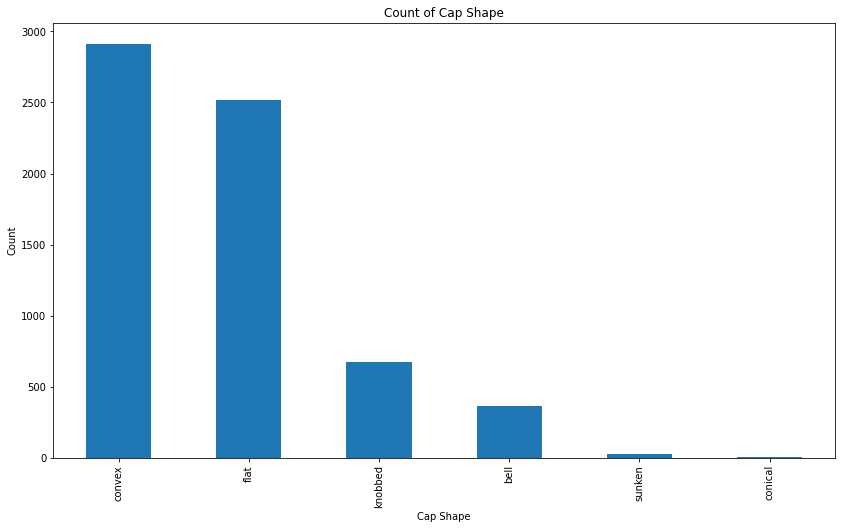

In [12]:
#Cap Shape
plot = X_train['cap-shape'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Cap Shape")
plot.set_xlabel("Cap Shape")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

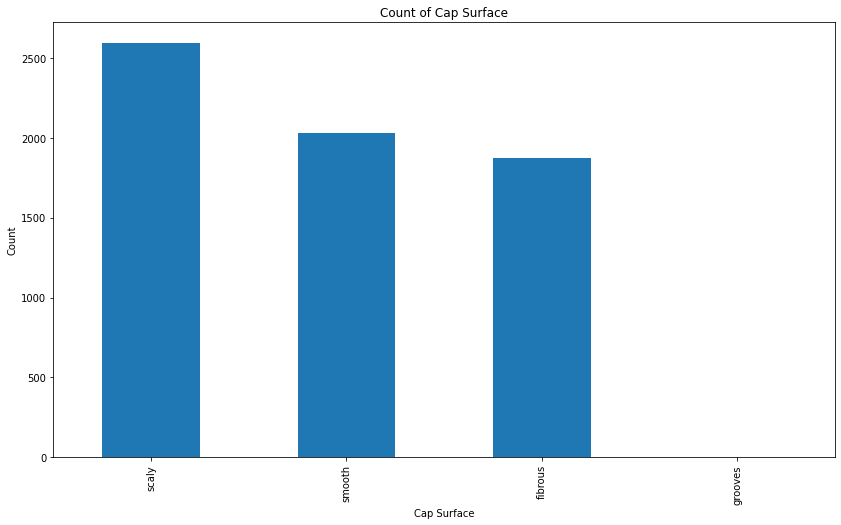

In [13]:
#Cap Surface
plot = X_train['cap-surface'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Cap Surface")
plot.set_xlabel("Cap Surface")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

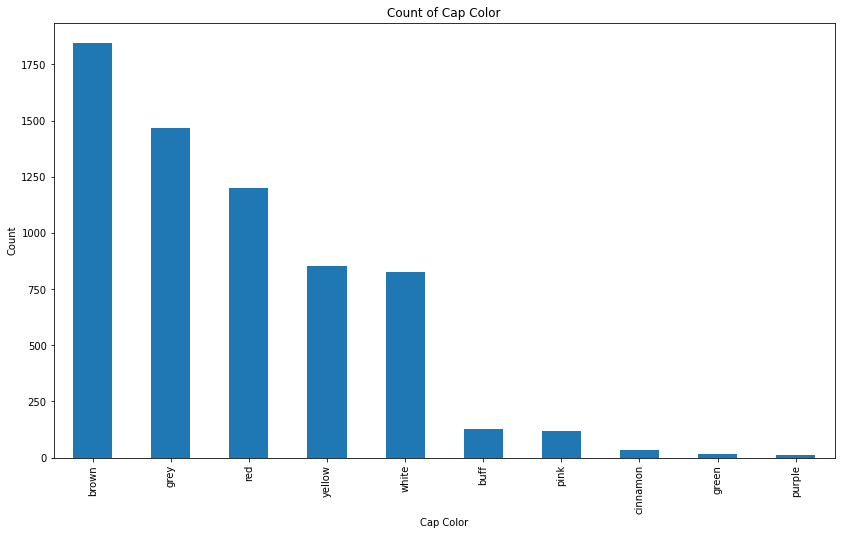

In [14]:
#Cap Color
plot = X_train['cap-color'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Cap Color")
plot.set_xlabel("Cap Color")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

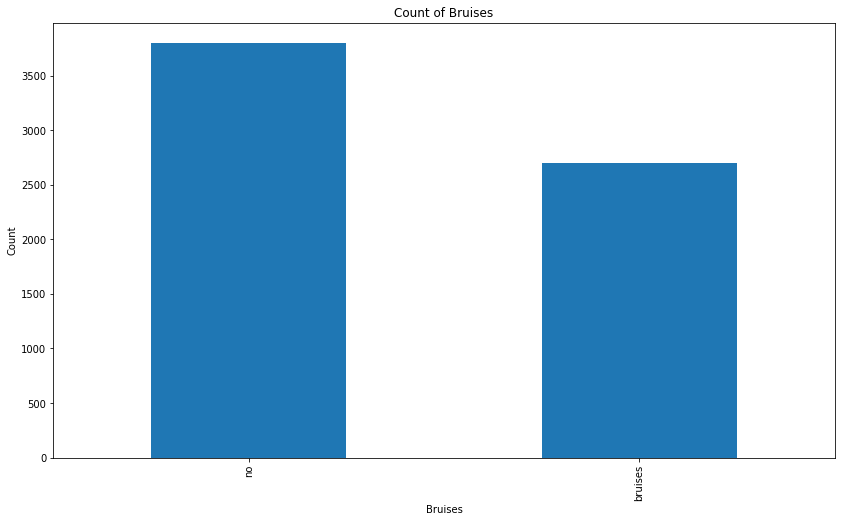

In [15]:
#Bruises
plot = X_train['bruises'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Bruises")
plot.set_xlabel("Bruises")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

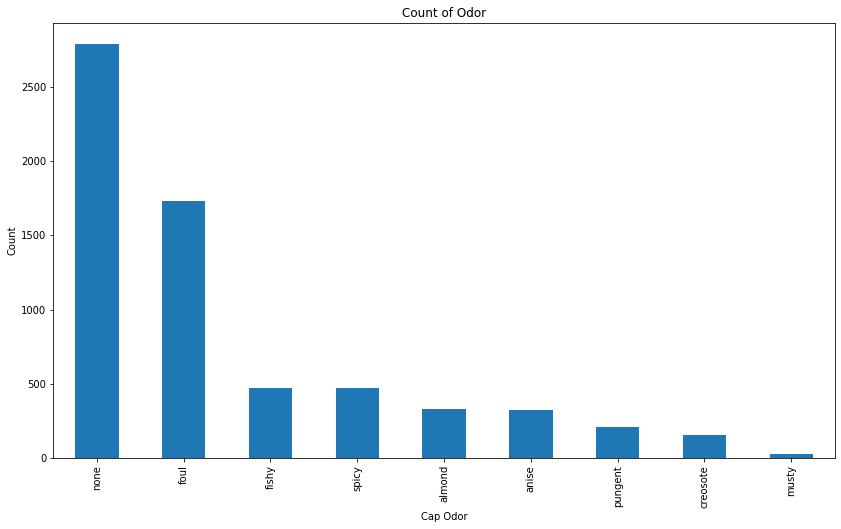

In [16]:
#Cap Shape
plot = X_train['odor'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Odor")
plot.set_xlabel("Cap Odor")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

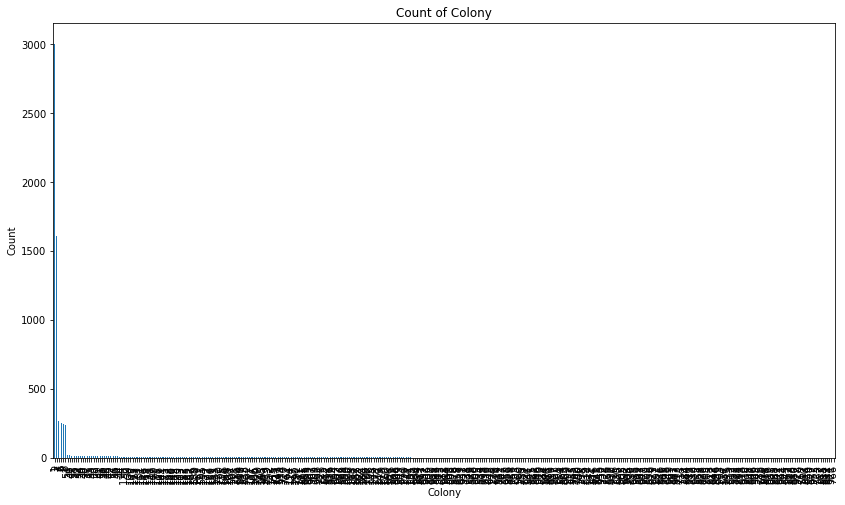

In [17]:
#Colony
plot = X_train['colony'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Colony")
plot.set_xlabel("Colony")
plot.set_ylabel("Count")

In [18]:
X_train['colony'].describe()

count     6499
unique     360
top          1
freq      3007
Name: colony, dtype: object

In [19]:
X_train['colony'] = X_train['colony'].astype('int')
X_train.loc[(X_train['colony'] <=2 ),'dcolony'] = 'single'
X_train.loc[(X_train['colony'] > 2 ),'dcolony'] = 'colony'
X_train = X_train.drop(columns=['colony'])

X_test['colony'] = X_test['colony'].astype('int')
X_test.loc[(X_test['colony'] <=2 ),'dcolony'] = 'single'
X_test.loc[(X_test['colony'] >2 ),'dcolony'] = 'colony'
X_test = X_test.drop(columns=['colony'])

<ipython-input-19-5e62faaf4f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['colony'] = X_train['colony'].astype('int')
c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\owner\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

## Mining or Analytics:
Using two way tables to get frequency of attribute per class.

In [20]:
cap_shape = pd.crosstab(index=X_train["cap-shape"],columns=Y_train["edible"],margins=True)
cap_shape

edible,edible,inedible,All
cap-shape,,,
bell,329,37,366
conical,0,4,4
convex,1534,1381,2915
flat,1287,1233,2520
knobbed,177,494,671
sunken,23,0,23
All,3350,3149,6499


Base on the frequency of edible and inedible, we would generate the following rule set for the Cap Shape attribute:

bell -> Edible     
conical	-> Inedible  
convex -> Edible   
flat -> Edible     
knobbed	-> Inedible  
sunken -> Edible  

Now we determine the error rate of the Cap Shape rules.

In [21]:
errors = 0
errors += cap_shape.loc['bell','inedible'] 
errors += cap_shape.loc['conical','edible']
errors += cap_shape.loc['convex','inedible']
errors += cap_shape.loc['flat','inedible']
errors += cap_shape.loc['knobbed','edible']
errors += cap_shape.loc['sunken','inedible']

error_rate = errors/cap_shape.loc['All','All']
error_rate

0.43514386828742885

In [22]:
cap_shape.loc['All','All']


6499

In [23]:
cap_surface = pd.crosstab(index=X_train["cap-surface"],columns=Y_train["edible"],margins=True)
cap_surface

edible,edible,inedible,All
cap-surface,,,
fibrous,1264,612,1876
grooves,0,2,2
scaly,1196,1397,2593
smooth,890,1138,2028
All,3350,3149,6499


Base on the frequency of edible and inedible, we would generate the following rule set for the Cap Surface attribute:

fibrous -> Edible  
grooves	-> Inedible  
scaly -> Inedible  
smooth -> Inedible 

Now we determine the error rate of the Cap Surface rules.

In [24]:
errors = 0
errors += cap_surface.loc['fibrous','inedible'] 
errors += cap_surface.loc['grooves','edible']
errors += cap_surface.loc['scaly','edible']
errors += cap_surface.loc['smooth','edible']

error_rate = errors/cap_surface.loc['All','All']
error_rate

0.4151407908909063

In [25]:
cap_color = pd.crosstab(index=X_train["cap-color"],columns=Y_train["edible"],margins=True)
cap_color

edible,edible,inedible,All
cap-color,,,
brown,1024,820,1844
buff,35,92,127
cinnamon,23,10,33
green,15,0,15
grey,824,645,1469
pink,49,70,119
purple,12,0,12
red,482,720,1202
white,562,262,824


Base on the frequency of edible and inedible, we would generate the following rule set for the Cap Color attribute:        

brown -> Edible  
buff  -> Inedible  
cinnamon -> Edible  
green -> Edible  
grey -> Edible  
pink  -> Inedible  
purple  -> Edible  
red  -> Inedible  
white  -> Edible  
yellow -> Inedible  

Now we determine the error rate of the Cap Color rules.

In [26]:
errors = 0
errors += cap_color.loc['brown','inedible'] 
errors += cap_color.loc['buff','edible']
errors += cap_color.loc['cinnamon','inedible']
errors += cap_color.loc['green','inedible']
errors += cap_color.loc['grey','inedible']
errors += cap_color.loc['pink','edible']
errors += cap_color.loc['purple','inedible']
errors += cap_color.loc['red','edible']
errors += cap_color.loc['white','inedible']
errors += cap_color.loc['yellow','edible']


error_rate = errors/cap_color.loc['All','All']
error_rate

0.40421603323588245

In [27]:
bruises= pd.crosstab(index=X_train["bruises"],columns=Y_train["edible"],margins=True)
bruises

edible,edible,inedible,All
bruises,,,
bruises,2206,497,2703
no,1144,2652,3796
All,3350,3149,6499


Base on the frequency of edible and inedible, we would generate the following rule set for the Cap Color attribute:

bruises -> Edible    
no  -> Inedible  

Now we determine the error rate of the Bruises rules.

In [28]:
errors = 0
errors += bruises.loc['bruises','inedible'] 
errors += bruises.loc['no','edible']


error_rate = errors/bruises.loc['All','All']
error_rate

0.2525003846745653

In [29]:
odor = pd.crosstab(index=X_train["odor"],columns=Y_train["edible"],margins=True)
odor

edible,edible,inedible,All
odor,,,
almond,329,0,329
anise,324,0,324
creosote,0,153,153
fishy,0,470,470
foul,0,1729,1729
musty,0,25,25
none,2697,93,2790
pungent,0,209,209
spicy,0,470,470


Base on the frequency of edible and inedible, we would generate the following rule set for the Odor attribute:

almond -> edible	
anise	-> edible   
creosote ->	inedible      	
fishy	-> inedible  
foul	-> inedible	 
musty	-> inedible	 
none	-> edible	  
pungent	-> inedible	    
spicy	-> inedible 

Now we determine the error rate of the Odor rules.

In [30]:
errors = 0
errors += odor.loc['almond','inedible'] 
errors += odor.loc['anise','inedible']
errors += odor.loc['creosote','edible']
errors += odor.loc['fishy','edible']
errors += odor.loc['foul','edible']
errors += odor.loc['musty','edible']
errors += odor.loc['none','inedible']
errors += odor.loc['pungent','edible']
errors += odor.loc['spicy','edible']


error_rate = errors/odor.loc['All','All']
error_rate

0.014309893829819972

In [31]:
dcolony = pd.crosstab(index=X_train["dcolony"],columns=Y_train["edible"],margins=True)
dcolony

edible,edible,inedible,All
dcolony,,,
colony,1553,332,1885
single,1797,2817,4614
All,3350,3149,6499


Base on the frequency of edible and inedible, we would generate the following rule set for the Discretized Colony attribute:

colony -> edible
single -> inedible

Now we determine the error rate of the Colony rules.

In [32]:
errors = 0
errors += dcolony.loc['colony','inedible'] 
errors += dcolony.loc['single','edible']

error_rate = errors/dcolony.loc['All','All']
error_rate

0.3275888598245884

The Rule Set with the best error rate is the Odor Rules Set, which has an error rate of 0.0143.

So we choose the the Odor Rules Set as out One Rule.

## Evaluation:

After selecting the Odor Rules Set we want to evalues the model with our test data set to see if our model could be generalizable.

almond -> edible	
anise	-> edible   
creosote ->	inedible      	
fishy	-> inedible  
foul	-> inedible	 
musty	-> inedible	 
none	-> edible	  
pungent	-> inedible	    
spicy	-> inedible 

In [33]:
# Determine predicted values
prediction = pd.DataFrame(X_test['odor'])
prediction = prediction.rename(columns={'odor': 'prediction'})

prediction[prediction['prediction'] ==  'almond'] = 'edible'
prediction[prediction['prediction'] ==  'anise'] = 'edible'
prediction[prediction['prediction'] ==  'creosote'] = 'inedible'
prediction[prediction['prediction'] ==  'fishy'] = 'inedible'
prediction[prediction['prediction'] ==  'foul'] = 'inedible'
prediction[prediction['prediction'] ==  'musty'] = 'inedible'
prediction[prediction['prediction'] ==  'none'] = 'edible'
prediction[prediction['prediction'] ==  'pungent'] = 'inedible'
prediction[prediction['prediction'] ==  'spicy'] = 'inedible'

In [34]:
Y_test

,edible
186,edible
2883,edible
5769,inedible
4363,inedible
2889,edible
...,...
5129,inedible
4895,inedible
6744,inedible
896,edible


In [35]:
# Confusion Matrix

cm = confusion_matrix(Y_test['edible'], prediction['prediction'])
print(cm)

[[858   0]
 [ 27 740]]


In [36]:
print("Accuracy Score :")
print(accuracy_score(Y_test['edible'], prediction['prediction']))
print("\n")
print("Report :")
print(classification_report(Y_test['edible'], prediction['prediction'])) 

Accuracy Score :
0.9833846153846154


Report :
              precision    recall  f1-score   support

      edible       0.97      1.00      0.98       858
    inedible       1.00      0.96      0.98       767

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



After validating the model against the test data, we found the accuracy of the model to be 0.98.  This is enough to make us comfortable with models.

## Results:

After a successfull validation, we feel that the Odor Rules Set would make a good model to determine whether a mushroom is edible or non-edible. The Odor Rules Set are as follows:

almond -> edible  
anise -> edible  
creosote -> inedible  
fishy -> inedible  
foul -> inedible  
musty -> inedible  
none -> edible  
pungent -> inedible  
spicy -> inedible  

## References:
    
Stack Overflow. (2015). Pandas DataFrame: replace all values in a column, based on condition. Retrieved (2020, June 22) from https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition


https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-an-unordered-list

https://stackoverflow.com/questions/48939795/how-to-plot-a-count-bar-chart-with-a-pandas-df-grouping-by-one-categorical-colu

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/